In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('./EEG_data.csv')
data = pd.read_csv('./demographic_info.csv')

In [4]:
data = data.rename(columns={'subject ID': 'SubjectID',
                   ' gender': 'gender', ' age': 'age', ' ethnicity': 'ethnicity'})
df = df.merge(data, how='inner', on='SubjectID')
# df.head()

In [5]:
df['gender'] = df['gender'].replace({'M': 1, 'F': 0})
df['ethnicity'] = df['ethnicity'].replace(
    {'Han Chinese': 0, 'Bengali': 1, 'English': 2})
df.drop(columns=['SubjectID', 'VideoID', 'predefinedlabel'], inplace=True)

In [6]:
df.columns

Index(['Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2',
       'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'user-definedlabeln', 'age',
       'ethnicity', 'gender'],
      dtype='object')

In [7]:
top_fea = df.drop(['user-definedlabeln'], axis=1)

In [8]:
top_fea.columns

Index(['Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2',
       'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'age', 'ethnicity', 'gender'],
      dtype='object')

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

In [10]:
from sklearn.model_selection import train_test_split
y = df['user-definedlabeln']
X = df.drop(columns=['user-definedlabeln'])
X_train, x_test, Y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.27)

In [11]:
scaler = StandardScaler()
svm_classifier = SVC()

pipeline = make_pipeline(scaler, svm_classifier)

pipeline.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [12]:
x_test.head(1000)

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,age,ethnicity,gender
772,41.0,78.0,195.0,2508980.0,474498.0,344011.0,154192.0,52440.0,98050.0,241122.0,31639.0,25,0,1
10196,54.0,47.0,101.0,52708.0,23416.0,6995.0,8509.0,15975.0,35520.0,16925.0,12796.0,25,0,1
385,37.0,48.0,71.0,39565.0,23315.0,4450.0,3213.0,3810.0,4556.0,2861.0,1351.0,25,0,1
4269,0.0,0.0,-10.0,2110853.0,1151980.0,120538.0,236133.0,125886.0,116159.0,109341.0,11701.0,28,0,0
8,43.0,69.0,17.0,492796.0,120998.0,63697.0,68242.0,10769.0,88403.0,73756.0,22676.0,25,0,1


In [14]:
x_test.head(1000).to_csv('test.csv', index=False)

In [14]:
received_data = pd.read_csv('test.csv')

In [15]:
X_new_standardized = scaler.transform(received_data)
predictions = svm_classifier.predict(X_new_standardized)
predictions

array([1., 0., 0., 1., 1.])

In [25]:
y_test.head()

772      1.0
10196    0.0
385      1.0
4269     0.0
8        0.0
Name: user-definedlabeln, dtype: float64

In [14]:

received_array = np.array([41.0,78.0,195.0,2508980.0,474498.0,344011.0,154192.0,52440.0,98050.0,241122.0,31639.0,25,0,1])
# Convert the array into a DataFrame with the same structure
columns_to_select = ['Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2',
       'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'age', 'ethnicity', 'gender']
# Create a new DataFrame with the selected columns
received_dataframe = pd.DataFrame(data=[received_array], columns=columns_to_select)
# received_dataframe
X_new = received_dataframe
X_new_standardized = scaler.transform(X_new)
predictions = svm_classifier.predict(X_new_standardized)
predictions


array([1.])

## Performance Scores

In [33]:
X_new = x_test
X_new_standardized = scaler.transform(X_new)
predictions = svm_classifier.predict(X_new_standardized).astype(int)
predictions.shape

(3459,)

In [22]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.6562590344030067

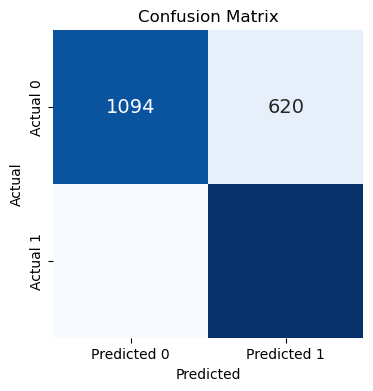

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report

# Assuming cm is your confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap with labels and display exact numerical values
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14}, xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [32]:
target_names = ['class 0', 'class 1']
print("Classification Report\n")
print(classification_report(y_test, predictions, target_names=target_names))

Classification Report

              precision    recall  f1-score   support

     class 0       0.66      0.64      0.65      1714
     class 1       0.65      0.67      0.66      1745

    accuracy                           0.66      3459
   macro avg       0.66      0.66      0.66      3459
weighted avg       0.66      0.66      0.66      3459



In [16]:
# saving pipeline as joblib file

import joblib

joblib.dump(pipeline, 'svm_model.joblib')

['svm_model.joblib']